In [1]:
import math
import os
import sys
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'
import multiprocessing
import parmap
import numpy as np
import collections
from tqdm.notebook import tqdm
import pandarallel
from pandarallel import pandarallel

pandarallel.initialize(nb_workers=20, progress_bar=True)
# tqdm.pandas()
from pprint import pprint
from scipy.stats import zscore
import requests
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mc
from matplotlib.colors import LogNorm
sys.path.append('..')
from src.utils.utils import load_config_file
import json

INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [9]:
import matplotlib.font_manager as font_manager

font_dirs = ['/home/weber/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.weight'] = 'light'

sns.set_context('paper', font_scale=1.5)

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  """


In [3]:
def show_values_on_bars(axs, i=0, fontsize=10, rotation=0):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            print(p)
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            if i == 0:
                value = "{:.0f}".format(p.get_height())
            if i == 2:
                value = "{:.2f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation)

            if i == 3:
                value = "{:.3f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [ ]:
# yaml = load_config_file()
# exotic_files = yaml["EXOTIC"]

In [2]:
# exotic_file = pd.read_parquet('/gstock/EXOTIC/data/EXOTIC/EXOTIC.parquet')
exotic_file = pd.read_parquet('/gstock/EXOTIC/data/EXOTIC/EXOTIC_2021_corrected.parquet')
exotic_file

,symbol,ensg,HGNC,Exon,Ratio_num,mRNA_nb,mRNA_nb_total,MAP,mean_proportion,Adipose - Subcutaneous_exotic,...,Skin - Not Sun Exposed (Suprapubic)_pextvalue,Skin - Sun Exposed (Lower leg)_pextvalue,Small Intestine - Terminal Ileum_pextvalue,Spleen_pextvalue,Stomach_pextvalue,Testis_pextvalue,Thyroid_pextvalue,Uterus_pextvalue,Vagina_pextvalue,Whole Blood_pextvalue
0,A2ML1,ENSG00000166535,23336,8975248-8975309,0.500000,1,2,A2ML1_8975248-8975309,0.69514,0.731334,...,0.57888,0.54618,1.00000,1.00000,1.00000,0.20471,1.00000,0.43478,0.69070,1.00000
1,A2ML1,ENSG00000166535,23336,8975778-8975961,0.500000,1,2,A2ML1_8975778-8975961,0.69514,0.731334,...,0.57888,0.54618,1.00000,1.00000,1.00000,0.20471,1.00000,0.43478,0.69070,1.00000
2,A2ML1,ENSG00000166535,23336,8976316-8976478,0.500000,1,2,A2ML1_8976316-8976478,0.69514,0.731334,...,0.57888,0.54618,1.00000,1.00000,1.00000,0.20471,1.00000,0.43478,0.69070,1.00000
3,A2ML1,ENSG00000166535,23336,8982323-8982375,0.500000,1,2,A2ML1_8982323-8982375,0.69514,0.731334,...,0.57888,0.54618,1.00000,1.00000,1.00000,0.20471,1.00000,0.43478,0.69070,1.00000
4,A2ML1,ENSG00000166535,23336,8987258-8987278,0.500000,1,2,A2ML1_8987258-8987278,0.69514,0.731334,...,0.57888,0.54618,1.00000,1.00000,1.00000,0.20471,1.00000,0.43478,0.69070,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27533,ZXDC,ENSG00000070476,28160,126158475-126158570,0.500000,1,2,ZXDC_126158475-126158570,0.20989,0.537660,...,0.32139,0.33902,0.21816,0.19747,0.21200,0.30612,0.23097,0.22240,0.25458,0.17905
27534,ZXDC,ENSG00000070476,28160,126160608-126160789,0.500000,1,2,ZXDC_126160608-126160789,0.20989,0.537660,...,0.32139,0.33902,0.21816,0.19747,0.21200,0.30612,0.23097,0.22240,0.25458,0.17905
27535,ZXDC,ENSG00000070476,28160,126178496-126178580,0.500000,1,2,ZXDC_126178496-126178580,0.20989,0.537660,...,0.32139,0.33902,0.21816,0.19747,0.21200,0.30612,0.23097,0.22240,0.25458,0.17905
27536,ZXDC,ENSG00000070476,28160,126180378-126181063,0.500000,1,2,ZXDC_126180378-126181063,0.34803,0.695551,...,0.42717,0.45013,0.29346,0.23675,0.30617,0.40887,0.31467,0.38270,0.38482,0.20952


      symbol  MAP
0       A1CF    3
1        A2M    5
2      A2ML1   13
3       AAAS    1
4       AACS    3
...      ...  ...
8751  ZWILCH    5
8752   ZWINT    2
8753    ZXDC    5
8754  ZYG11A    4
8755     ZYX    1

[8756 rows x 2 columns]


(0.0, 15.0)

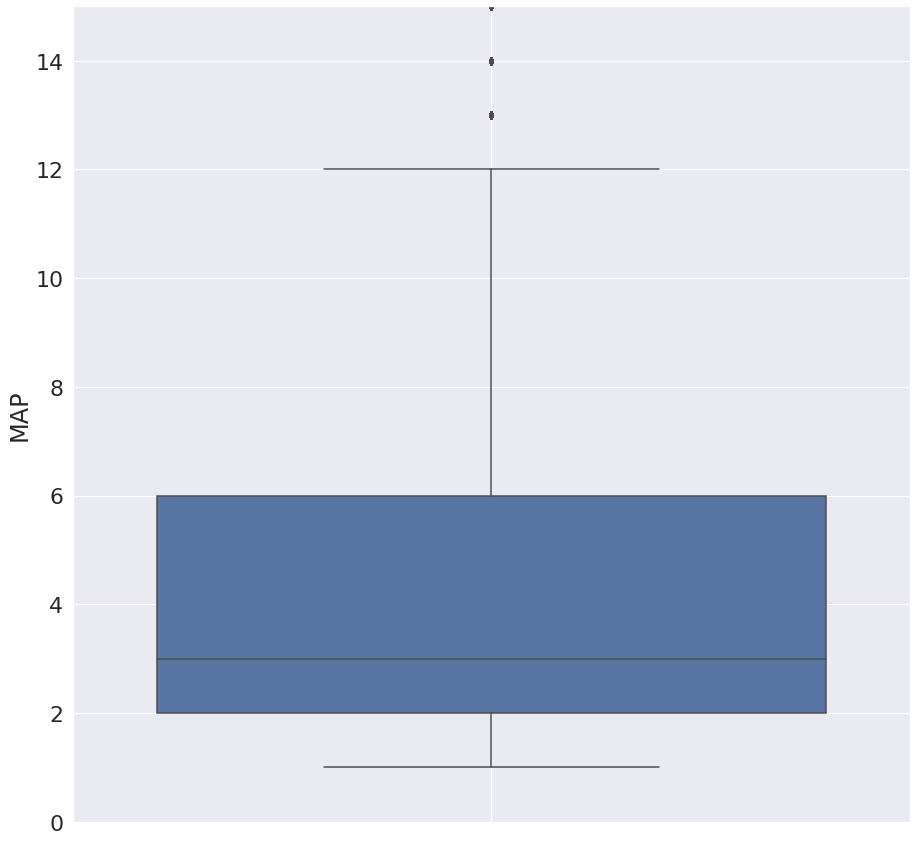

In [6]:
intermediate_file = exotic_file.drop_duplicates()

test = intermediate_file[["symbol", "MAP"]].groupby("symbol").nunique().drop(["symbol"], axis=1).reset_index()
print(test)
sns.set(font_scale=2)
sns.set_style
f, ax = plt.subplots(figsize=(15, 15))
v = sns.boxplot(data=test, y="MAP", ax=ax)
# self.show_values_on_bars(v, 0)
# v.set_xticklabels(v.get_xticklabels(), rotation=90)
plt.xlabel("")
ax.grid(True, axis="x")
ax.set_ylim(0, 15)

In [4]:
intermediate_file = exotic_file.drop_duplicates()
intermediate_file = intermediate_file.loc[
    (intermediate_file["mean_proportion"] > 0)
    & (intermediate_file["mean_proportion"] < 1)
    # & (intermediate_file["Ratio_num"] <= 0.5)
].reset_index(drop=True)
# intermediate_file = intermediate_file.loc[(intermediate_file["Ratio_num"] > 0.5)].reset_index(drop=True)

# intermediate_file = intermediate_file.tail(1000)

pext = intermediate_file.filter(regex="pext")

exotic = intermediate_file.filter(regex="exotic")
pext["Max"] = pext.parallel_apply(lambda r: max(r.dropna()) if r.dropna().shape[0] > 0 else np.nan, axis=1)
pext["MAP"] = intermediate_file["MAP"]
pext["symbol"] = intermediate_file["symbol"]

exotic["Max"] = exotic.parallel_apply(lambda r: max(r.dropna()) if r.dropna().shape[0] > 0 else np.nan, axis=1)
exotic["Tissues_Max"] = exotic.parallel_apply(
    lambda r: [list(exotic.columns)[j].replace("_exotic", "") for j, e in enumerate(r[:-1]) if e == r["Max"]], axis=1
)
exotic["Tissues_Max_organs"] = exotic["Tissues_Max"].apply(lambda r: list(set([e.split(" - ")[0] for e in r])))
exotic["pext_max"] = pext["Max"]

exotic["MAP"] = intermediate_file["MAP"]
exotic["Ratio_num"] = intermediate_file["Ratio_num"]
exotic["mRNA_nb"] = intermediate_file["mRNA_nb"]
exotic["symbol"] = intermediate_file["symbol"]

# # exotic = exotic.loc[(exotic["Max"] > 0.99)]

# # print(exotic[["MAP", "Nerve - Tibial_exotic"]])
# # print(pext.loc[exotic.index])

# # exotic["tissues_no_threshold"] = (
# #     exotic.filter(regex="exotic")
# #     .fillna(0)
# #     .apply(
# #         lambda r: [exotic.columns[j].replace("_exotic", "") for j, c in enumerate(r) if c >= 0.90 and c < 0.95], axis=1
# #     )
# # )

exotic["tissues_OK_bronze"] = (
    exotic.filter(regex="exotic")
    .fillna(0)
    .apply(
        lambda r: [exotic.columns[j].replace("_exotic", "") for j, c in enumerate(r) if c >= 0.90 and c < 0.95], axis=1
    )
)
exotic["tissues_OK_silver"] = (
    exotic.filter(regex="exotic")
    .fillna(0)
    .apply(
        lambda r: [exotic.columns[j].replace("_exotic", "") for j, c in enumerate(r) if c >= 0.95 and c < 0.99], axis=1
    )
)
exotic["tissues_OK_gold"] = (
    exotic.filter(regex="exotic")
    .fillna(0)
    .apply(lambda r: [exotic.columns[j].replace("_exotic", "") for j, c in enumerate(r) if c >= 0.99], axis=1)
)
exotic["pext_OK"] = (
    pext.filter(regex="pext")
    .fillna(0)
    .apply(lambda r: [pext.columns[j].replace("_pextvalue", "") for j, c in enumerate(r) if c > 0.1], axis=1)
)
# exotic["No_threshold"] = exotic.apply(
#     lambda r: list(set(r["tissues_no_threshold"]).intersection(set(r["pext_OK"]))), axis=1
# )
exotic["OK_bronze"] = exotic.apply(lambda r: list(set(r["tissues_OK_bronze"]).intersection(set(r["pext_OK"]))), axis=1)
exotic["OK_silver"] = exotic.apply(lambda r: list(set(r["tissues_OK_silver"]).intersection(set(r["pext_OK"]))), axis=1)
exotic["OK_gold"] = exotic.apply(lambda r: list(set(r["tissues_OK_gold"]).intersection(set(r["pext_OK"]))), axis=1)
exotic["OK"] = exotic.apply(lambda r: r["OK_bronze"] + r["OK_silver"] + r["OK_gold"], axis=1)


# print(
#     pd.concat(
#         [
#             # exotic["No_threshold"].explode().value_counts(),
#             exotic["OK_bronze"].explode().value_counts(),
#             exotic["OK_silver"].explode().value_counts(),
#             exotic["OK_gold"].explode().value_counts(),
#         ],
#         axis=1,
#     )
# )

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


Text(-0.05, 1.08, 'a')

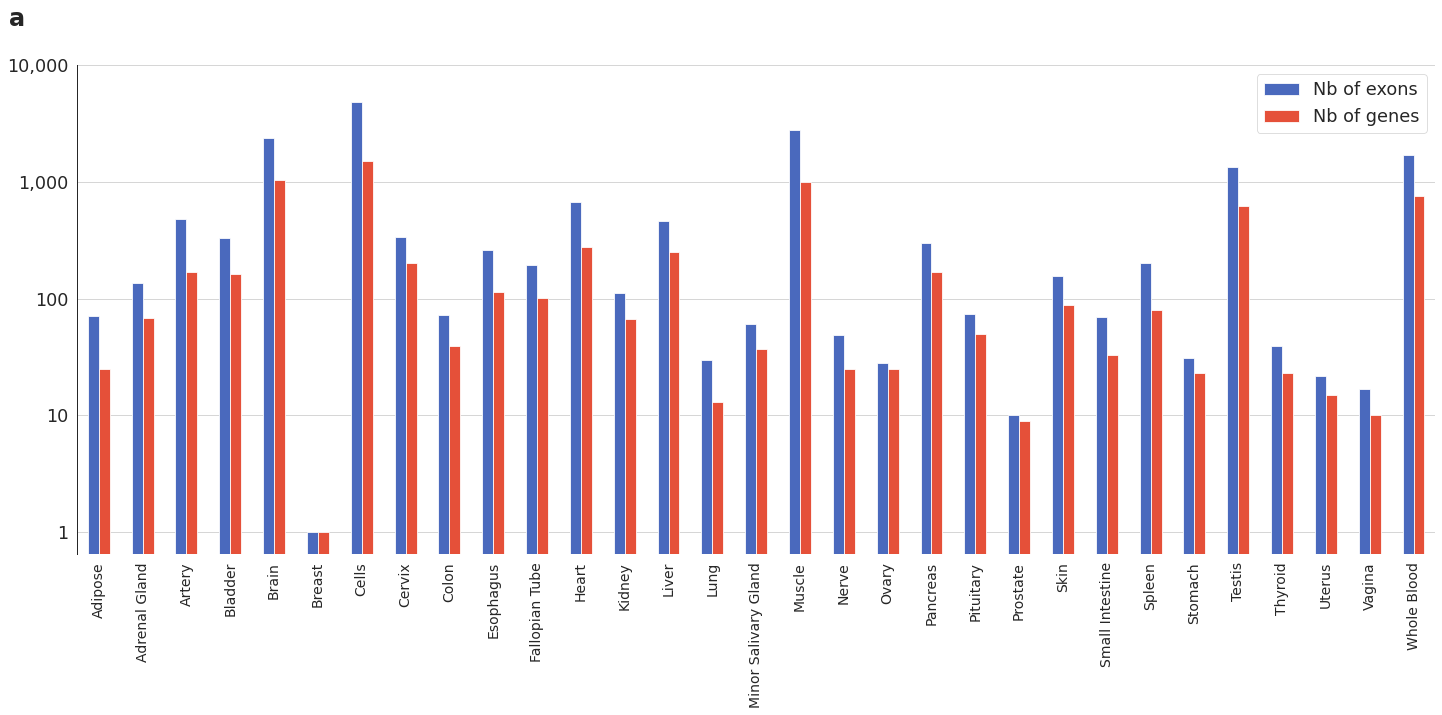

In [5]:
t = exotic[["MAP", "symbol", "OK"]]
t['SuperOK'] = t['OK'].apply(lambda r: [e.split(' - ')[0] for e in r])
t = t.loc[t["SuperOK"].str.len() > 0].explode("SuperOK")

t = t.groupby(["SuperOK"]).nunique().drop(["SuperOK", 'OK'], axis=1)
t.columns = ["Nb of exons", "Nb of genes"]

sns.set_style('white')
sns.set_context("paper", font_scale=2)
f, ax = plt.subplots(figsize=(20, 10))
v = t.plot.bar(ax=ax, color=['#4a69bd', '#e55039'])
# show_values_on_bars(v, 0)
v.set_xticklabels(v.get_xticklabels(), rotation=90, fontsize=14)
plt.xlabel("")
plt.yscale("log")

ax.grid(True, axis="y")
f.tight_layout(rect=[0, 0.05, 1, 1])
ax.spines['bottom'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.tick_params(axis = "x", which = "both", bottom = False, top = False)
plt.ylim(0, 10000)
ax.text(-0.05, 1.08, 'a', transform=ax.transAxes, size=24, weight='bold')

# f.savefig("data/paper/1_EXOTIC/barplot_tissues_genes_exons.png")


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


Text(-0.05, 1.08, 'a')

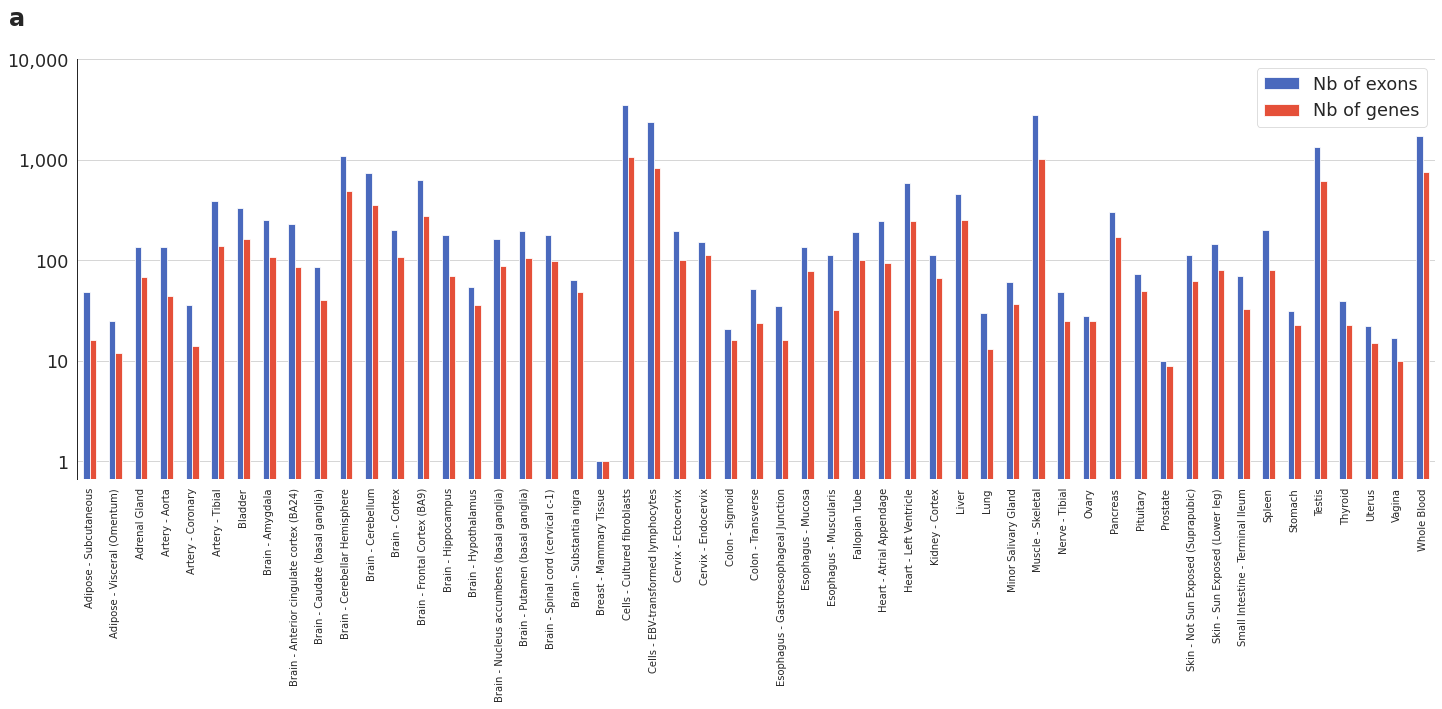

In [6]:
t = exotic[["MAP", "symbol", "OK"]]
t = t.loc[t["OK"].str.len() > 0].explode("OK")
t = t.groupby(["OK"]).nunique().drop(["OK"], axis=1)
t.columns = ["Nb of exons", "Nb of genes"]

sns.set_style('white')
sns.set_context("paper", font_scale=2)
f, ax = plt.subplots(figsize=(20, 10))
v = t.plot.bar(ax=ax, color=['#4a69bd', '#e55039'])
# show_values_on_bars(v, 0)
v.set_xticklabels(v.get_xticklabels(), rotation=90, fontsize=10)
plt.xlabel("")
plt.yscale("log")

ax.grid(True, axis="y")
f.tight_layout(rect=[0, 0.05, 1, 1])
ax.spines['bottom'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.tick_params(axis = "x", which = "both", bottom = False, top = False)
plt.ylim(0, 10000)
ax.text(-0.05, 1.08, 'a', transform=ax.transAxes, size=24, weight='bold')

# f.savefig("data/paper/1_EXOTIC/barplot_tissues_genes_exons.png")


In [5]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = bins.copy()
labels_ratio = [str(round(labels[j], 1)) + " - " + str(round(labels[j + 1], 1)) for j in range(len(labels) - 1)]
exotic["Ratio_num_bins"] = pd.cut(exotic["Ratio_num"], bins=bins, labels=labels_ratio, include_lowest=True)

bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = bins.copy()
labels_ratio = [str(round(labels[j], 1)) + " - " + str(round(labels[j + 1], 1)) for j in range(len(labels) - 1)]
exotic["pext_max_bins"] = pd.cut(exotic["pext_max"], bins=bins, labels=labels_ratio, include_lowest=True)

bins = [0, 0.9, 0.95, 0.99, 1]
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
exotic["Max_bins"] = pd.cut(exotic["Max"], bins=bins, labels=labels_ratio, include_lowest=True)


In [34]:
exotic.loc[exotic['OK'].str.len() > 0]

,Adipose - Subcutaneous_exotic,Adipose - Visceral (Omentum)_exotic,Adrenal Gland_exotic,Artery - Aorta_exotic,Artery - Coronary_exotic,Artery - Tibial_exotic,Bladder_exotic,Brain - Amygdala_exotic,Brain - Anterior cingulate cortex (BA24)_exotic,Brain - Caudate (basal ganglia)_exotic,...,tissues_OK_silver,tissues_OK_gold,pext_OK,OK_bronze,OK_silver,OK_gold,OK,Ratio_num_bins,pext_max_bins,Max_bins
0,NaN,NaN,0.390920,0.390920,NaN,0.390920,0.390920,NaN,NaN,NaN,...,[],[],"[Liver, Pancreas, Small Intestine - Terminal I...","[Liver, Pancreas]",[],[],"[Liver, Pancreas]",0.2 - 0.4,0.2 - 0.4,0.9 - 0.95
15,0.326105,0.326105,0.326105,0.326105,0.326105,0.326105,0.372216,0.534350,0.624124,0.631461,...,[],[],"[Brain - Amygdala, Brain - Anterior cingulate ...","[Cervix - Endocervix, Ovary, Brain - Cerebella...",[],[],"[Cervix - Endocervix, Ovary, Brain - Cerebella...",0.4 - 0.6,0.4 - 0.6,0.9 - 0.95
16,0.758851,0.709829,0.256318,0.738283,0.690467,0.817057,0.754720,0.366258,0.462202,0.549436,...,[],[],"[Adipose - Subcutaneous, Adipose - Visceral (O...",[Cells - Cultured fibroblasts],[],[],[Cells - Cultured fibroblasts],0.6 - 0.8,0.8 - 1,0.9 - 0.95
17,0.758851,0.709829,0.256318,0.738283,0.690467,0.817057,0.754720,0.366258,0.462202,0.549436,...,[],[],"[Adipose - Subcutaneous, Adipose - Visceral (O...",[Cells - Cultured fibroblasts],[],[],[Cells - Cultured fibroblasts],0.6 - 0.8,0.8 - 1,0.9 - 0.95
18,0.758851,0.709829,0.256318,0.738283,0.690467,0.817057,0.754720,0.366258,0.462202,0.549436,...,[],[],"[Adipose - Subcutaneous, Adipose - Visceral (O...",[Cells - Cultured fibroblasts],[],[],[Cells - Cultured fibroblasts],0.4 - 0.6,0.8 - 1,0.9 - 0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45048,0.728523,0.537890,0.457341,0.793858,0.664111,0.939074,0.771235,0.388147,0.438358,0.386596,...,[],[],"[Adipose - Subcutaneous, Adipose - Visceral (O...",[Artery - Tibial],[],[],[Artery - Tibial],0.4 - 0.6,0.2 - 0.4,0.9 - 0.95
45049,0.368199,0.368199,0.368199,0.368199,0.368199,0.368199,0.912362,0.368199,0.368199,0.368199,...,[],[],"[Bladder, Breast - Mammary Tissue, Cells - Cul...","[Bladder, Cells - Cultured fibroblasts, Cells ...",[],[],"[Bladder, Cells - Cultured fibroblasts, Cells ...",0.4 - 0.6,0.8 - 1,0.9 - 0.95
45050,0.368199,0.368199,0.368199,0.368199,0.368199,0.368199,0.912362,0.368199,0.368199,0.368199,...,[],[],"[Bladder, Breast - Mammary Tissue, Cells - Cul...","[Bladder, Cells - Cultured fibroblasts, Cells ...",[],[],"[Bladder, Cells - Cultured fibroblasts, Cells ...",0.4 - 0.6,0.8 - 1,0.9 - 0.95
45051,0.368199,0.368199,0.368199,0.368199,0.368199,0.368199,0.912362,0.368199,0.368199,0.368199,...,[],[],"[Bladder, Breast - Mammary Tissue, Cells - Cul...","[Bladder, Cells - Cultured fibroblasts, Cells ...",[],[],"[Bladder, Cells - Cultured fibroblasts, Cells ...",0.4 - 0.6,0.8 - 1,0.9 - 0.95


Rectangle(xy=(-0.4, 0), width=0.2, height=13913, angle=0)
Rectangle(xy=(0.6, 0), width=0.2, height=4645, angle=0)
Rectangle(xy=(-0.2, 0), width=0.2, height=7031, angle=0)
Rectangle(xy=(0.8, 0), width=0.2, height=2622, angle=0)
Rectangle(xy=(2.77556e-17, 0), width=0.2, height=5302, angle=0)
Rectangle(xy=(1, 0), width=0.2, height=1983, angle=0)
Rectangle(xy=(0.2, 0), width=0.2, height=1282, angle=0)
Rectangle(xy=(1.2, 0), width=0.2, height=686, angle=0)


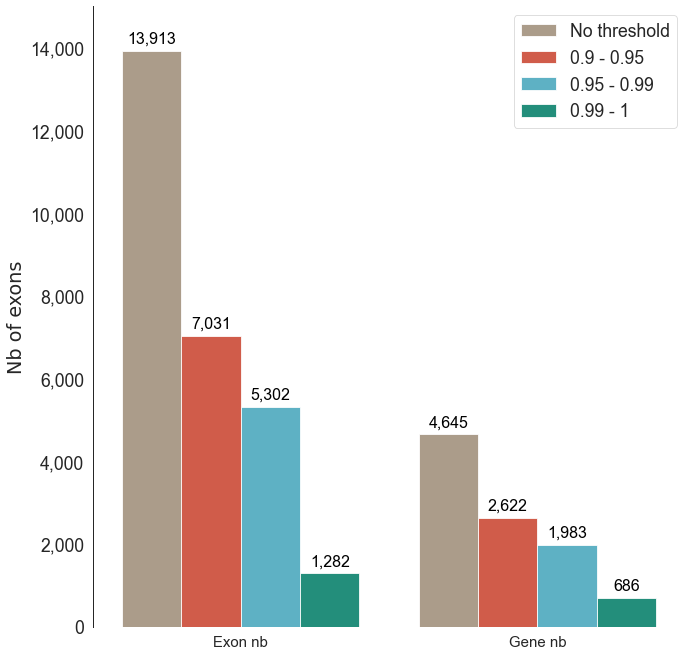

In [10]:

## BARPLOT EXOTIC COUNT CUTOFFS

def show_values_on_bars(axs, i=0, fontsize=10, rotation=0, color='black', pad=10):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            print(p)
            _x = p.get_x() + p.get_width()/2 
            _y = p.get_y() + (p.get_height()) + pad
            if i == 0:
                value = "{:,.0f}".format(p.get_height())
            if i == 2:
                value = "{:.2f}".format(p.get_height())

            if i == 3:
                value = "{:.3f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation, color=color)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

tmp_barplot = pd.concat([exotic, intermediate_file[['symbol', 'Exon']]], axis=1, join='inner')
tmp_barplot_exon_level = tmp_barplot[['Max_bins', 'Exon']].drop_duplicates().groupby("Max_bins").size().reset_index()
tmp_barplot_exon_level.columns = ['Max_bins', 'Exon nb']
tmp_barplot_gene_level = tmp_barplot[['Max_bins', 'symbol']].drop_duplicates().groupby("Max_bins").size().reset_index()
tmp_barplot_gene_level.columns = ['Max_bins', 'Gene nb']
tmp_barplot = pd.concat([tmp_barplot_exon_level, tmp_barplot_gene_level['Gene nb']], axis=1)
# tmp_barplot['Exons nb / gene'] = tmp_barplot['Exon nb'] / tmp_barplot['Gene nb']
tmp_barplot = tmp_barplot.melt(id_vars='Max_bins', value_vars=['Exon nb', 'Gene nb'])
# tmp_barplot.columns = ["variable", "value"]
# tmp_barplot["Max_bins"] = tmp_barplot["Max_bins"].cat.rename_categories(
#     {"0 - 0.9": "No\nthreshold", "0.9 - 0.95": "Bronze", "0.95 - 0.99": "Silver", "0.99 - 1": "Gold"}
# )
if "0 - 0.8" in tmp_barplot["Max_bins"].cat.categories:
    tmp_barplot["Max_bins"] = tmp_barplot["Max_bins"].cat.remove_categories(["0 - 0.8"])

# tmp_barplot = tmp_barplot.loc[tmp_barplot["variable"].isna() == False]
# # tmp_barplot["variable"] = tmp_barplot["variable"].cat.add_categories(["Total"])
# # tmp_barplot.loc[0] = ["Total", exotic.shape[0]]
# tmp_barplot.sort_index(inplace=True)
# tmp_barplot

sns.set_style('white')
sns.set_context("paper", font_scale=2)
f, ax = plt.subplots(figsize=(10, 10))
v = sns.barplot(data=tmp_barplot, x="variable", y="value", hue='Max_bins', ax=ax, palette=["#B09C85FF", "#E64B34", "#4DBBD5", "#11A087"])
plt.xticks()
show_values_on_bars(v, i=0, fontsize=16, pad=200)
v.set_xticklabels(v.get_xticklabels(),fontsize=15)
plt.xlabel("")
plt.ylabel("Nb of exons")
# ax.grid(True, axis="y")
ax.spines['bottom'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.tick_params(axis = "x", which = "both", bottom = False, top = False)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
f.tight_layout(rect=[0, 0.05, 1, 1])
plt.ylim(0,15000)
legend = v.get_legend()
legend.set_title('')
legend.texts[0].set_text("No threshold")
# ax.text(-0.15, 1.05, 'a', transform=ax.transAxes, size=24, weight='bold')

# legend.texts[1].set_text("Alternative")
# # f.savefig("data/paper/1_EXOTIC/barplot_test_exotic_bins.png")


In [15]:
print(exotic.loc[exotic['OK'].str.len() > 0 ].MAP.nunique())
print(exotic.loc[exotic['OK'].str.len() > 0 ].symbol.nunique())

12714
3860


In [ ]:
import matplotlib.font_manager as font_manager

font_dirs = ['/home/weber/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.weight'] = 'light'

sns.set_context('paper', font_scale=1.5)


tmp_barplot_tissues = exotic.loc[exotic['Max'] > 0.9].filter(regex='exotic').melt()
tmp_barplot_tissues.columns = ['Tissue', 'value']
tmp_barplot_tissues['Tissue'] = tmp_barplot_tissues['Tissue'].str.replace('_exotic', '')
tmp_barplot_tissues = tmp_barplot_tissues.loc[tmp_barplot_tissues['value'] > 0.9].reset_index(drop=True)
tmp_barplot_tissues = tmp_barplot_tissues.loc[~tmp_barplot_tissues['Tissue'].str.contains('Breast')]
l = list()
value = 100
for t in tmp_barplot_tissues.Tissue.unique():
    tmp_t = tmp_barplot_tissues.loc[tmp_barplot_tissues['Tissue'] == t]
    if tmp_t.shape[0] < value:
        pass
    elif tmp_t.shape[0] >= value:
        l.append(tmp_t.sample(n=value))
    
tmp_barplot_tissues = pd.concat(l)
# tmp_barplot_tissues = tmp_barplot_tissues.loc[tmp_barplot_tissues['Tissue'].isin(['Muscle - Skeletal', 'Whole Blood'])]
tmp_barplot_tissues.to_excel('/gstock/EXOTIC/data/EXOTIC/exotic_ridgeplot_data_lite.xlsx', index=False)
# tmp_barplot_tissues.loc[tmp_barplot_tissues['Tissue'].str.contains('Breast')]




# colors = pd.read_excel('/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx').set_index('Tissue')


# # Initialize the FacetGrid object
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# g = sns.FacetGrid(tmp_barplot_tissues.sample(frac=0.01), row="Tissue", hue="Tissue", aspect=15, height=.5, palette=colors['Color'].to_dict())

# # Draw the densities in a few steps
# g.map(sns.kdeplot, "value", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
# g.map(sns.kdeplot, "value", clip_on=False, color="w", lw=2, bw_adjust=.5)
# g.map(plt.axhline, y=0, lw=2, clip_on=False)


# # Define and use a simple function to label the plot in axes coordinates
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(-0.2, .25, label, fontweight="bold", color='black',
#             ha="left", va="center", transform=ax.transAxes)


# g.map(label, "value")

# for j, a in enumerate(g.axes.ravel()):
#     print(j)
#     a.set_xlim(0.9,1)
    
# # Set the subplots to overlap
# g.fig.subplots_adjust(hspace=-.25)

# # Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[])
# g.despine(bottom=True, left=True)

In [151]:
import matplotlib.font_manager as font_manager

font_dirs = ['/home/weber/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.weight'] = 'light'

sns.set_context('paper', font_scale=1.5)


tmp_barplot_tissues = exotic.loc[exotic['Max'] > 0.9].filter(regex='exotic|symbol').melt(value_vars=[c for c in exotic.columns if 'exotic' in c], id_vars=['symbol'])
tmp_barplot_tissues.columns = ["symbol", 'Tissue', 'value']
tmp_barplot_tissues['Tissue'] = tmp_barplot_tissues['Tissue'].str.replace('_exotic', '')
tmp_barplot_tissues = tmp_barplot_tissues.loc[tmp_barplot_tissues['value'] > 0.9].reset_index(drop=True)
tmp_barplot_tissues = tmp_barplot_tissues.loc[~tmp_barplot_tissues['Tissue'].str.contains('Breast')]
tmp_barplot_tissues

# l = list()
# value = 0
# for t in tmp_barplot_tissues.Tissue.unique():
#     tmp_t = tmp_barplot_tissues.loc[tmp_barplot_tissues['Tissue'] == t]
#     if tmp_t.shape[0] < value:
#         pass
#     elif tmp_t.shape[0] >= value:
#         l.append(tmp_t.sample(n=value))
    
# tmp_barplot_tissues = pd.concat(l)
# tmp_barplot_tissues = tmp_barplot_tissues.loc[tmp_barplot_tissues['Tissue'].isin(['Muscle - Skeletal', 'Whole Blood'])]
tmp_barplot_tissues.to_excel('/gstock/EXOTIC/data/EXOTIC/exotic_ridgeplot_data.xlsx', index=False)
tmp_barplot_tissues[['symbol', 'Tissue']].groupby('Tissue').agg("nunique").shape
# tmp_barplot_tissues.loc[tmp_barplot_tissues['Tissue'].str.contains('Breast')]




# colors = pd.read_excel('/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx').set_index('Tissue')


# # Initialize the FacetGrid object
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# g = sns.FacetGrid(tmp_barplot_tissues.sample(frac=0.01), row="Tissue", hue="Tissue", aspect=15, height=.5, palette=colors['Color'].to_dict())

# # Draw the densities in a few steps
# g.map(sns.kdeplot, "value", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
# g.map(sns.kdeplot, "value", clip_on=False, color="w", lw=2, bw_adjust=.5)
# g.map(plt.axhline, y=0, lw=2, clip_on=False)


# # Define and use a simple function to label the plot in axes coordinates
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(-0.2, .25, label, fontweight="bold", color='black',
#             ha="left", va="center", transform=ax.transAxes)


# g.map(label, "value")

# for j, a in enumerate(g.axes.ravel()):
#     print(j)
#     a.set_xlim(0.9,1)
    
# # Set the subplots to overlap
# g.fig.subplots_adjust(hspace=-.25)

# # Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[])
# g.despine(bottom=True, left=True)

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  """


(52, 2)

In [118]:

bronze = exotic["OK_bronze"].explode().dropna().value_counts()
silver = exotic["OK_silver"].explode().dropna().value_counts()
gold = exotic["OK_gold"].explode().dropna().value_counts()

tmp_barplot_tissues = (
    pd.concat([bronze, silver, gold], axis=1)
    .reset_index()
    .melt(id_vars="index", value_vars=["OK_bronze", "OK_silver", "OK_gold"])
)
tmp_barplot_tissues.columns = ["Tissue", "Threshold", "Nb of exons"]

colors = pd.read_excel('/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx')
tmp_barplot_tissues["Threshold"] = tmp_barplot_tissues["Threshold"].str.replace("OK_", "")
tmp_barplot_tissues = tmp_barplot_tissues.pivot(index='Tissue', columns='Threshold', values='Nb of exons')
tmp_barplot_tissues = tmp_barplot_tissues.fillna(0)
tmp_barplot_tissues['Total'] = tmp_barplot_tissues.apply(np.sum, axis=1)
tmp_barplot_tissues = tmp_barplot_tissues.reset_index()
tmp_barplot_tissues['log_value'] = tmp_barplot_tissues['Total'].apply(np.log10)
tmp_barplot_tissues['group'] = 'A'
tmp_barplot_tissues = pd.merge(tmp_barplot_tissues, colors, on='Tissue')
tmp_barplot_tissues = tmp_barplot_tissues.loc[~tmp_barplot_tissues['Tissue'].str.contains('Breast')]
tmp_barplot_tissues.to_excel('/gstock/EXOTIC/data/EXOTIC/circular_barplot_total.xlsx', index=False)
tmp_barplot_tissues


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Tissue,bronze,gold,silver,Total,log_value,group,Abbrev,Color,Samples
0,Adipose - Subcutaneous,44.0,0.0,5.0,49.0,1.690196,A,ADPSBQ,#FF6600,581.0
1,Adipose - Visceral (Omentum),22.0,0.0,3.0,25.0,1.397940,A,ADPVSC,#FFAA00,469.0
2,Adrenal Gland,111.0,1.0,25.0,137.0,2.136721,A,ADRNLG,#33DD33,233.0
3,Artery - Aorta,128.0,1.0,6.0,135.0,2.130334,A,ARTAORT,#FF5555,387.0
4,Artery - Coronary,32.0,0.0,4.0,36.0,1.556303,A,ARTCRN,#FFAA99,213.0
5,Artery - Tibial,358.0,1.0,28.0,387.0,2.587711,A,ARTTBL,#FF0000,584.0
6,Bladder,268.0,10.0,52.0,330.0,2.518514,A,BLADDER,#A90000,NaN
7,Brain - Amygdala,246.0,1.0,6.0,253.0,2.403121,A,BRNAMY,#EEEE00,129.0
8,Brain - Anterior cingulate cortex (BA24),228.0,0.0,4.0,232.0,2.365488,A,BRNACC,#EEEE00,147.0
9,Brain - Caudate (basal ganglia),77.0,0.0,9.0,86.0,1.934498,A,BRNCDT,#EEEE00,194.0


In [84]:

bronze = exotic["OK_bronze"].explode().dropna().value_counts()
silver = exotic["OK_silver"].explode().dropna().value_counts()
gold = exotic["OK_gold"].explode().dropna().value_counts()

tmp_barplot_tissues = (
    pd.concat([bronze, silver, gold], axis=1)
    .reset_index()
    .melt(id_vars="index", value_vars=["OK_bronze", "OK_silver", "OK_gold"])
)
tmp_barplot_tissues.columns = ["Tissue", "Threshold", "Nb of exons"]

colors = pd.read_excel('/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx')
tmp_barplot_tissues["Threshold"] = tmp_barplot_tissues["Threshold"].str.replace("OK_", "")
tmp_barplot_tissues = tmp_barplot_tissues.pivot(index='Tissue', columns='Threshold', values='Nb of exons')
tmp_barplot_tissues = tmp_barplot_tissues.fillna(0)
tmp_barplot_tissues['Total'] = tmp_barplot_tissues.apply(np.sum, axis=1)
tmp_barplot_tissues = tmp_barplot_tissues.reset_index()
tmp_barplot_tissues['log_value'] = tmp_barplot_tissues['Total'].apply(np.log10)
tmp_barplot_tissues['group'] = 'A'
tmp_barplot_tissues = pd.merge(tmp_barplot_tissues, colors, on='Tissue')
tmp_barplot_tissues = tmp_barplot_tissues.loc[~tmp_barplot_tissues['Tissue'].str.contains('Breast')]
tmp_barplot_tissues.to_excel('/gstock/EXOTIC/data/EXOTIC/circular_barplot_total.xlsx', index=False)
tmp_barplot_tissues


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Tissue,bronze,gold,silver,Total,log_value,group,Abbrev,Color,Samples
0,Adipose - Subcutaneous,44.0,0.0,5.0,49.0,1.690196,A,ADPSBQ,#FF6600,581
1,Adipose - Visceral (Omentum),22.0,0.0,3.0,25.0,1.397940,A,ADPVSC,#FFAA00,469
2,Adrenal Gland,111.0,1.0,25.0,137.0,2.136721,A,ADRNLG,#33DD33,233
3,Artery - Aorta,128.0,1.0,6.0,135.0,2.130334,A,ARTAORT,#FF5555,387
4,Artery - Coronary,32.0,0.0,4.0,36.0,1.556303,A,ARTCRN,#FFAA99,213
5,Artery - Tibial,358.0,1.0,28.0,387.0,2.587711,A,ARTTBL,#FF0000,584
6,Brain - Amygdala,246.0,1.0,6.0,253.0,2.403121,A,BRNAMY,#EEEE00,129
7,Brain - Anterior cingulate cortex (BA24),228.0,0.0,4.0,232.0,2.365488,A,BRNACC,#EEEE00,147
8,Brain - Caudate (basal ganglia),77.0,0.0,9.0,86.0,1.934498,A,BRNCDT,#EEEE00,194
9,Brain - Hippocampus,156.0,0.0,22.0,178.0,2.250420,A,BRNHPP,#EEEE00,165


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


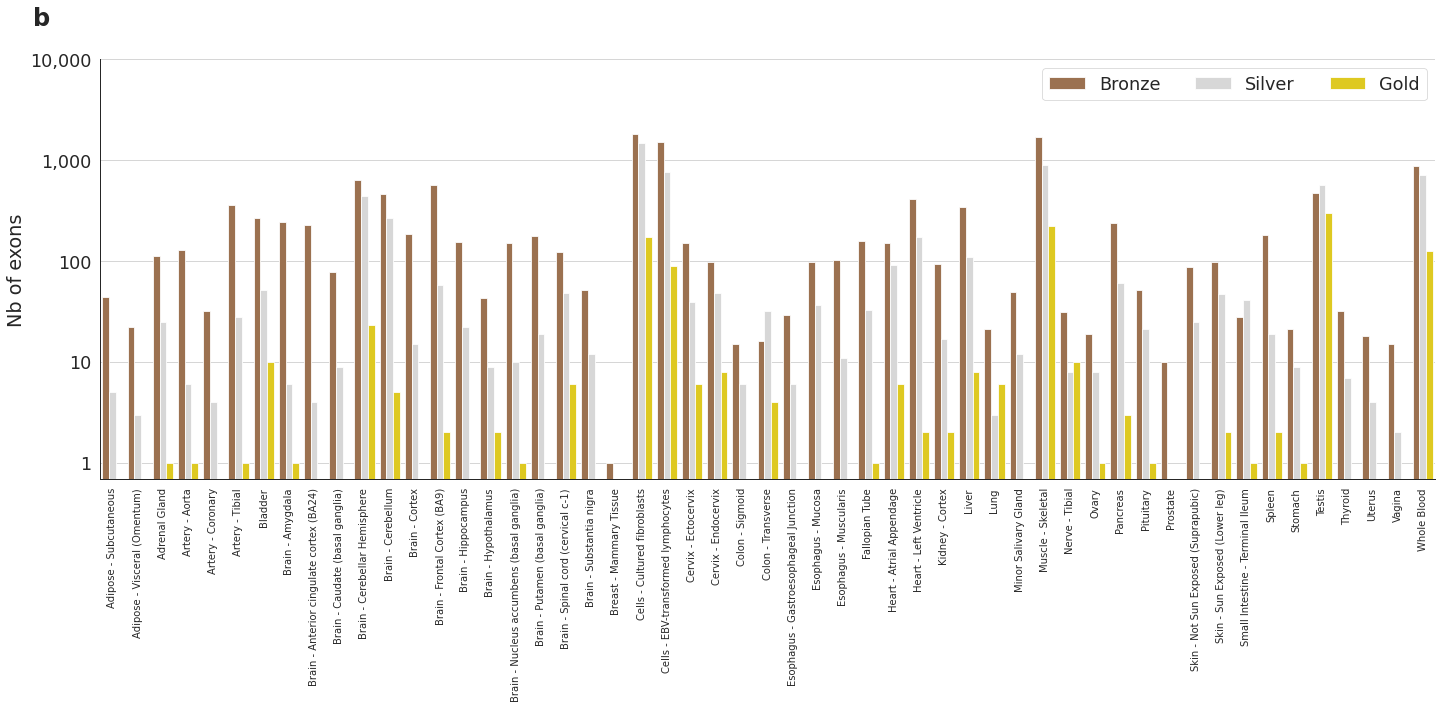

In [10]:
def show_values_on_bars(axs, i=0, fontsize=10, rotation=0, color='black', pad=10):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            print(p)
            _x = p.get_x() + p.get_width()/2 
            _y = p.get_y() + (p.get_height()) + pad
            if i == 0:
                value = "{:,.0f}".format(p.get_height())
            if i == 2:
                value = "{:.2f}".format(p.get_height())

            if i == 3:
                value = "{:.3f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation, color=color)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

bronze = exotic["OK_bronze"].explode().dropna().value_counts()
silver = exotic["OK_silver"].explode().dropna().value_counts()
gold = exotic["OK_gold"].explode().dropna().value_counts()

tmp_barplot_tissues = (
    pd.concat([bronze, silver, gold], axis=1)
    .reset_index()
    .melt(id_vars="index", value_vars=["OK_bronze", "OK_silver", "OK_gold"])
)
tmp_barplot_tissues.columns = ["Tissue", "Threshold", "Nb of exons"]
tmp_barplot_tissues["Threshold"] = tmp_barplot_tissues["Threshold"].str.replace("OK_", "")
tmp_barplot_tissues

sns.set_style('white')
sns.set_context("paper", font_scale=2)
f, ax = plt.subplots(figsize=(20, 10))
v = sns.barplot(
    data=tmp_barplot_tissues,
    x="Tissue",
    y="Nb of exons",
    hue="Threshold",
    ax=ax,
    palette=["#A77044", "#D7D7D7", "#FEE101"],
)
# show_values_on_bars(v, i=0, fontsize=8, rotation=90, pad=0)
v.set_xticklabels(v.get_xticklabels(), rotation=90, fontsize=10)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
plt.xlabel("")
plt.yscale('log')
ax.grid(True, axis="y")
f.tight_layout(rect=[0, 0.05, 1, 1])
legend = v.get_legend()
legend.set_title('')
ax.text(-0.05, 1.08, 'b', transform=ax.transAxes, size=24, weight='bold')
plt.ylim(0, 10000)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.ticklabel_format(axis='y', useOffset=False)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
v.legend(ncol=3)

legend = v.get_legend()
legend.set_title('')
legend.texts[0].set_text("Bronze")
legend.texts[1].set_text("Silver")
legend.texts[2].set_text("Gold")
# f.savefig("data/paper/1_EXOTIC/barplot_test_exotic_bins_tissues_05.png")

In [154]:
bronze = exotic["OK_bronze"].explode().dropna().value_counts()
silver = exotic["OK_silver"].explode().dropna().value_counts()
gold = exotic["OK_gold"].explode().dropna().value_counts()

tmp_barplot_tissues = (
    pd.concat([bronze, silver, gold], axis=1)
    .reset_index()
    .melt(id_vars="index", value_vars=["OK_bronze", "OK_silver", "OK_gold"])
)
tmp_barplot_tissues.columns = ["Tissue", "Threshold", "Nb of exons"]
tmp_barplot_tissues["Threshold"] = tmp_barplot_tissues["Threshold"].str.replace("OK_", "")
tmp_barplot_tissues

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Tissue,Threshold,Nb of exons
0,Adipose - Subcutaneous,bronze,44.0
1,Adipose - Visceral (Omentum),bronze,22.0
2,Adrenal Gland,bronze,111.0
3,Artery - Aorta,bronze,128.0
4,Artery - Coronary,bronze,32.0
5,Artery - Tibial,bronze,358.0
6,Bladder,bronze,268.0
7,Brain - Amygdala,bronze,246.0
8,Brain - Anterior cingulate cortex (BA24),bronze,228.0
9,Brain - Caudate (basal ganglia),bronze,77.0


In [ ]:
def show_values_on_bars(axs, i=0, fontsize=10, rotation=0, color='black', pad=10):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            print(p)
            _x = p.get_x() + p.get_width()/2 
            _y = p.get_y() + (p.get_height()) + pad
            if i == 0:
                value = "{:,.0f}".format(p.get_height())
            if i == 2:
                value = "{:.2f}".format(p.get_height())

            if i == 3:
                value = "{:.3f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation, color=color)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

bronze = exotic["OK_bronze"].explode().dropna().value_counts()
silver = exotic["OK_silver"].explode().dropna().value_counts()
gold = exotic["OK_gold"].explode().dropna().value_counts()

tmp_barplot_tissues = (
    pd.concat([bronze, silver, gold], axis=1)
    .reset_index()
    .melt(id_vars="index", value_vars=["OK_bronze", "OK_silver", "OK_gold"])
)
tmp_barplot_tissues.columns = ["Tissue", "Threshold", "Nb of exons"]
tmp_barplot_tissues["Threshold"] = tmp_barplot_tissues["Threshold"].str.replace("OK_", "")
tmp_barplot_tissues

sns.set_style('white')
sns.set_context("paper", font_scale=2)
f, ax = plt.subplots(figsize=(20, 10))
v = sns.barplot(
    data=tmp_barplot_tissues,
    x="Tissue",
    y="Nb of exons",
    hue="Threshold",
    ax=ax,
    palette=["#A77044", "#D7D7D7", "#FEE101"],
)
# show_values_on_bars(v, i=0, fontsize=8, rotation=90, pad=0)
v.set_xticklabels(v.get_xticklabels(), rotation=90, fontsize=10)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
plt.xlabel("")
plt.yscale('log')
ax.grid(True, axis="y")
f.tight_layout(rect=[0, 0.05, 1, 1])
legend = v.get_legend()
legend.set_title('')
# f.savefig("data/paper/1_EXOTIC/barplot_test_exotic_bins_tissues_05.png")

In [28]:

# HEATMAP

exotic["OK_organs"] = exotic["OK"].apply(lambda r: list(set([e.split(" - ")[0] for e in r])))
exotic["Len_tissues"] = exotic["OK"].apply(lambda r: len(r))

t = exotic.explode("OK_organs")
l = exotic["Tissues_Max_organs"].values.tolist()
l = [list(set([e.split(" - ")[0] for e in r])) for r in l if len(r) > 1]
l = [e for e in l if len(e) <= 2]
l = [[e[0], e[0]] if len(e) == 1 else e for e in l]
new_l = list()
for e in l:
    if e[0] == e[1]:
        new_l.append({"Tissue_0": e[0], "Tissue_1": e[1]})
    else:
        new_l.append({"Tissue_0": e[0], "Tissue_1": e[1]})
        # new_l.append({"Tissue_0": e[1], "Tissue_1": e[0]})

tmp_df_heatmap = pd.DataFrame(new_l).groupby(["Tissue_0", "Tissue_1"]).size()
tmp_df_heatmap = tmp_df_heatmap.reset_index()
tmp_df_heatmap.columns = ["Tissue_0", "Tissue_1", "value"]
tmp_df_heatmap
# print(tmp_df_heatmap.sort_values("value", ascending=False))

,Tissue_0,Tissue_1,value
0,Adrenal Gland,Liver,4
1,Adrenal Gland,Muscle,2
2,Artery,Adipose,1
3,Artery,Adrenal Gland,1
4,Artery,Brain,9
...,...,...,...
143,Uterus,Testis,2
144,Whole Blood,Cells,270
145,Whole Blood,Esophagus,1
146,Whole Blood,Liver,50


In [19]:



def median_pext(r):
    try:
        return np.median([e for e in r["pext_values"] if math.isnan(e) is False and e != r["pext_max"]])
    except:
        print(r)
        exit()

exotic_gap = exotic.copy()
exotic_gap["pext_max"] = pext["Max"]
exotic_gap["pext_values"] = pext[pext.columns[:-3]].values.tolist()
exotic_gap = exotic_gap.dropna(subset=["Max"])
exotic_gap = exotic_gap.loc[exotic_gap["pext_max"] > 0.1]
exotic_gap["pext_median_except_max"] = exotic_gap.apply(lambda r: median_pext(r), axis=1)
exotic_gap["pext_shift"] = exotic_gap["pext_max"] - exotic_gap["pext_median_except_max"]
exotic_gap
# print(exotic)


,Adipose - Subcutaneous_exotic,Adipose - Visceral (Omentum)_exotic,Adrenal Gland_exotic,Artery - Aorta_exotic,Artery - Coronary_exotic,Artery - Tibial_exotic,Bladder_exotic,Brain - Amygdala_exotic,Brain - Anterior cingulate cortex (BA24)_exotic,Brain - Caudate (basal ganglia)_exotic,...,OK_bronze,OK_silver,OK_gold,OK,Ratio_num_bins,pext_max_bins,Max_bins,pext_values,pext_median_except_max,pext_shift
0,0.731334,0.731334,0.731334,0.731334,0.731334,0.731334,0.486061,0.252556,0.239279,0.239806,...,[],[],[],[],0.4 - 0.6,0.8 - 1,0 - 0.9,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.67816, 0.3648...",0.391300,0.608700
1,0.731334,0.731334,0.731334,0.731334,0.731334,0.731334,0.486061,0.252556,0.239279,0.239806,...,[],[],[],[],0.4 - 0.6,0.8 - 1,0 - 0.9,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.67816, 0.3648...",0.391300,0.608700
2,0.731334,0.731334,0.731334,0.731334,0.731334,0.731334,0.486061,0.252556,0.239279,0.239806,...,[],[],[],[],0.4 - 0.6,0.8 - 1,0 - 0.9,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.67816, 0.3648...",0.391300,0.608700
3,0.731334,0.731334,0.731334,0.731334,0.731334,0.731334,0.486061,0.252556,0.239279,0.239806,...,[],[],[],[],0.4 - 0.6,0.8 - 1,0 - 0.9,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.67816, 0.3648...",0.391300,0.608700
4,0.731334,0.731334,0.731334,0.731334,0.731334,0.731334,0.486061,0.252556,0.239279,0.239806,...,[],[],[],[],0.4 - 0.6,0.8 - 1,0 - 0.9,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.67816, 0.3648...",0.391300,0.608700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27533,0.537660,0.648384,0.450742,0.609736,0.666997,0.611235,0.683508,0.274234,0.193642,0.219913,...,"[Skin - Sun Exposed (Lower leg), Muscle - Skel...",[],[],"[Skin - Sun Exposed (Lower leg), Muscle - Skel...",0.4 - 0.6,0.2 - 0.4,0.9 - 0.95,"[0.21827, 0.24386, 0.19892, 0.2346599999999999...",0.212040,0.128050
27534,0.537660,0.648384,0.450742,0.609736,0.666997,0.611235,0.683508,0.274234,0.193642,0.219913,...,"[Skin - Sun Exposed (Lower leg), Muscle - Skel...",[],[],"[Skin - Sun Exposed (Lower leg), Muscle - Skel...",0.4 - 0.6,0.2 - 0.4,0.9 - 0.95,"[0.21827, 0.24386, 0.19892, 0.2346599999999999...",0.212040,0.128050
27535,0.537660,0.648384,0.450742,0.609736,0.666997,0.611235,0.683508,0.274234,0.193642,0.219913,...,"[Skin - Sun Exposed (Lower leg), Muscle - Skel...",[],[],"[Skin - Sun Exposed (Lower leg), Muscle - Skel...",0.4 - 0.6,0.2 - 0.4,0.9 - 0.95,"[0.21827, 0.24386, 0.19892, 0.2346599999999999...",0.212040,0.128050
27536,0.695551,0.635819,0.433273,0.786516,0.731413,0.910061,0.809050,0.260939,0.227567,0.220972,...,[Artery - Tibial],[],[],[Artery - Tibial],0.4 - 0.6,0.4 - 0.6,0.9 - 0.95,"[0.41079, 0.39036, 0.32763000000000003, 0.4470...",0.336525,0.187315


In [35]:
tmp_barplot

,Ratio_num_bins,pext_max_bins,Max_bins,pext_max,Max
0,0.2 - 0.4,0.2 - 0.4,0.9 - 0.95,0.23614,0.949734
2,0.6 - 0.8,0.8 - 1,0 - 0.9,1.00000,0.574705
3,0.4 - 0.6,0.8 - 1,0 - 0.9,1.00000,0.735143
4,0.4 - 0.6,0.8 - 1,0 - 0.9,1.00000,0.735143
5,0.4 - 0.6,0.8 - 1,0 - 0.9,1.00000,0.735143
...,...,...,...,...,...
45049,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.89855,0.939435
45050,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.89855,0.939435
45051,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.89855,0.939435
45052,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.89855,0.939435


In [20]:
tmp_barplot = exotic_gap[
    [
        "Ratio_num_bins",
        "pext_max_bins",
        "Max_bins",
        "pext_max",
        "Max",
        "pext_median_except_max",
        "pext_shift",
    ]
]
tmp_barplot = tmp_barplot.rename({"Ratio_num_bins": "Exon freq"}, axis=1).melt(
    id_vars=[
        "Exon freq",
        "pext_max_bins",
        "Max_bins",
        "pext_max",
        'Max'
    ],
    value_vars=[
        "pext_median_except_max",
        "pext_shift",
        
        # "pext_max",
    ],
)
tmp_barplot

,Exon freq,pext_max_bins,Max_bins,pext_max,Max,variable,value
0,0.4 - 0.6,0.8 - 1,0 - 0.9,1.00000,0.731334,pext_median_except_max,0.391300
1,0.4 - 0.6,0.8 - 1,0 - 0.9,1.00000,0.731334,pext_median_except_max,0.391300
2,0.4 - 0.6,0.8 - 1,0 - 0.9,1.00000,0.731334,pext_median_except_max,0.391300
3,0.4 - 0.6,0.8 - 1,0 - 0.9,1.00000,0.731334,pext_median_except_max,0.391300
4,0.4 - 0.6,0.8 - 1,0 - 0.9,1.00000,0.731334,pext_median_except_max,0.391300
...,...,...,...,...,...,...,...
53063,0.4 - 0.6,0.2 - 0.4,0.9 - 0.95,0.34009,0.912582,pext_shift,0.128050
53064,0.4 - 0.6,0.2 - 0.4,0.9 - 0.95,0.34009,0.912582,pext_shift,0.128050
53065,0.4 - 0.6,0.2 - 0.4,0.9 - 0.95,0.34009,0.912582,pext_shift,0.128050
53066,0.4 - 0.6,0.4 - 0.6,0.9 - 0.95,0.52384,0.910061,pext_shift,0.187315


In [140]:
tmp_barplot

,Exon freq,pext_max_bins,Max_bins,pext_max,Max,variable,value
0,0.2 - 0.4,0.2 - 0.4,0.9 - 0.95,0.236140,0.949734,pext_median_except_max,0.000000
1,0.2 - 0.4,0 - 0.2,0.95 - 0.99,0.060643,0.957909,pext_median_except_max,0.000000
2,0.6 - 0.8,0.8 - 1,0 - 0.9,1.000000,0.574705,pext_median_except_max,0.942175
3,0.4 - 0.6,0.8 - 1,0 - 0.9,1.000000,0.735143,pext_median_except_max,0.391300
4,0.4 - 0.6,0.8 - 1,0 - 0.9,1.000000,0.735143,pext_median_except_max,0.391300
...,...,...,...,...,...,...,...
90103,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.898550,0.939435,pext_shift,0.898550
90104,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.898550,0.939435,pext_shift,0.898550
90105,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.898550,0.939435,pext_shift,0.898550
90106,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.898550,0.939435,pext_shift,0.898550


In [14]:

# CLEANING
exotic = exotic.dropna(subset=["Max"])
exotic = exotic.loc[exotic["pext_max"] > 0.1]

In [151]:
tmp_barplot

,Exon freq,pext_max_bins,Max_bins,pext_max,Max,variable,value
0,0.2 - 0.4,0.2 - 0.4,0.9 - 0.95,0.236140,0.949734,pext_median_except_max,0.000000
1,0.2 - 0.4,0 - 0.2,0.95 - 0.99,0.060643,0.957909,pext_median_except_max,0.000000
2,0.6 - 0.8,0.8 - 1,0 - 0.9,1.000000,0.574705,pext_median_except_max,0.942175
3,0.4 - 0.6,0.8 - 1,0 - 0.9,1.000000,0.735143,pext_median_except_max,0.391300
4,0.4 - 0.6,0.8 - 1,0 - 0.9,1.000000,0.735143,pext_median_except_max,0.391300
...,...,...,...,...,...,...,...
90103,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.898550,0.939435,pext_shift,0.898550
90104,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.898550,0.939435,pext_shift,0.898550
90105,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.898550,0.939435,pext_shift,0.898550
90106,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.898550,0.939435,pext_shift,0.898550


In [17]:
tmp_barplot

,Max_bins,variable,value
0,0 - 0.9,Exon nb,13913
1,0.9 - 0.95,Exon nb,7031
2,0.95 - 0.99,Exon nb,5302
3,0.99 - 1,Exon nb,1282
4,0 - 0.9,Gene nb,4645
5,0.9 - 0.95,Gene nb,2622
6,0.95 - 0.99,Gene nb,1983
7,0.99 - 1,Gene nb,686


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  """
/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



AttributeError: 'FacetGrid' object has no attribute 'get_ylim'

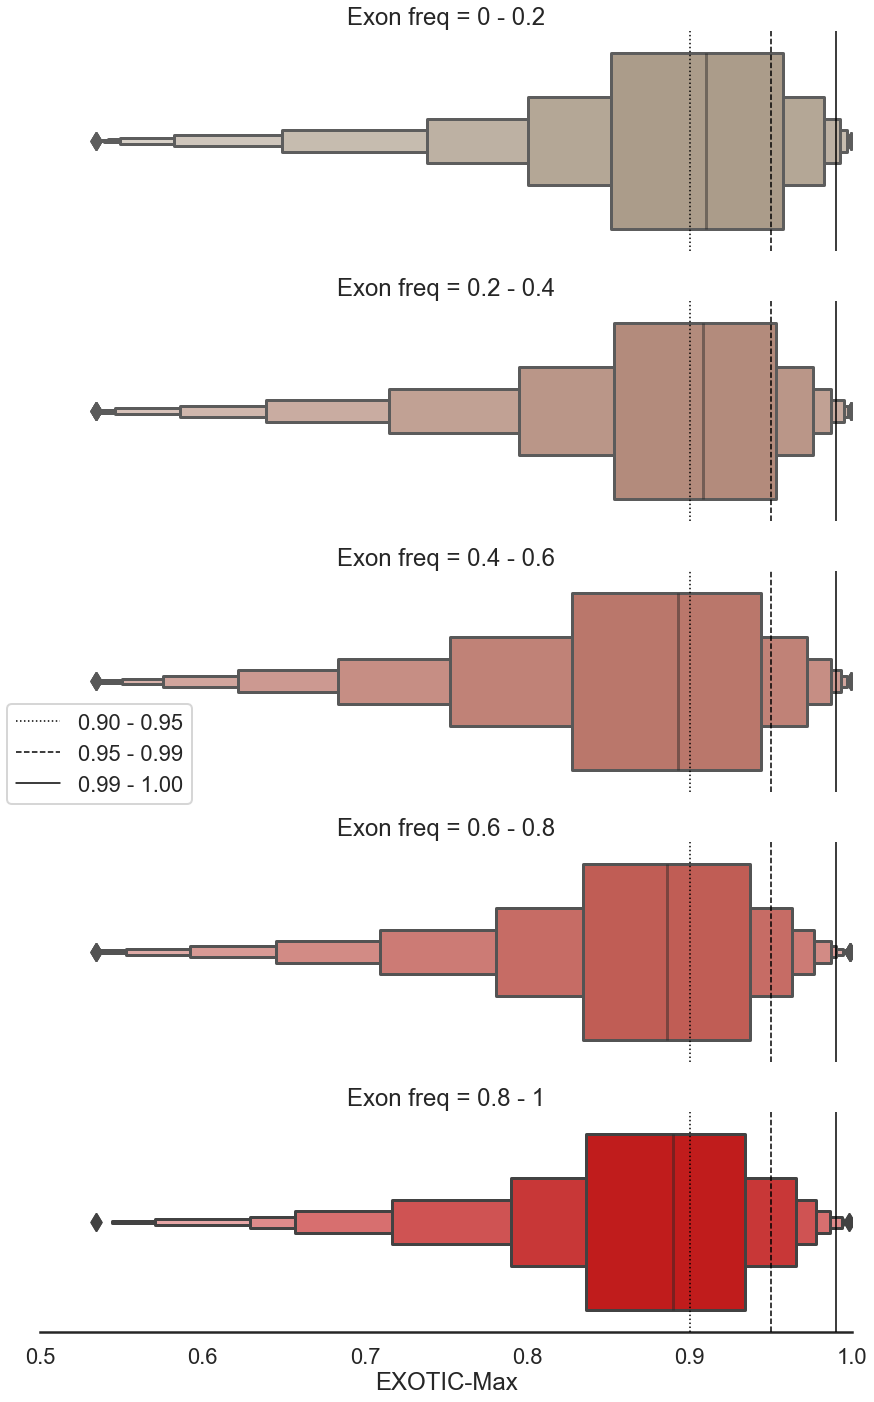

In [21]:

import matplotlib.font_manager as font_manager

font_dirs = ['/home/weber/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.weight'] = 'light'

sns.set_context('paper', font_scale=1.5)

sns.set_context("poster")
# f, ax = plt.subplots(figsize=(15, 15))
grid = sns.FacetGrid(
    tmp_barplot,
    row="Exon freq",
    hue="Exon freq",
    # row="Ratio_num_bins",
    palette=['#b09c85', '#bc8773', '#c76e5e', '#d24e43', '#dc0000'],
    # margin_titles=True,
    height=4,
    aspect=3,
)
grid.map(sns.boxenplot, "Max")
# self.show_values_on_bars(v, 0)
# v.set_xticklabels(v.get_xticklabels(), rotation=90)
# plt.xlabel("")
# ax.grid(True, axis="x")
# ["#A77044", "#D7D7D7", "#FEE101"]

lwa = 1.5
for j, ax in enumerate(grid.axes.flat):
    ax.spines['left'].set_linewidth(0)
    ax.axvline(0.9, zorder=3, linestyle=':', color='black', alpha=1, lw=lwa)
    ax.axvline(0.95, zorder=3, linestyle='--', color='black', alpha=1, lw=lwa)
    ax.axvline(0.99, zorder=3, linestyle='-', color='black', alpha=1, lw=lwa)
    ax.tick_params(axis = "y", which = "both", bottom = False, top = False, right=False, left=False)    

    if j != len(grid.axes.flat) - 1:
        ax.spines['bottom'].set_linewidth(0)

        ax.tick_params(axis = "x", which = "both", bottom = False, top = False, right=False, left=False)
        

    

plt.xlabel('EXOTIC-Max')
plt.xlim(0.5,1)
# ax.text(0, 6.05, 'a', transform=ax.transAxes, size=50, weight='bold')


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='black', lw=lwa, linestyle=':'),
                Line2D([0], [0], color='black', lw=lwa, linestyle='--'),
                Line2D([0], [0], color='black', lw=lwa, linestyle='-')]

plt.legend(custom_lines, ['0.90 - 0.95', '0.95 - 0.99', '0.99 - 1.00'], bbox_to_anchor=(0,1.9,0.2,1))

#     x.grid(True, axis="x")
#     x.set_xlim(0.5, 1)
# grid.fig.tight_layout()
# grid.fig.savefig("data/paper/1_EXOTIC/facetgrid_test_ratio_exotic.png")

from statannot import add_stat_annotation
add_stat_annotation(grid, data=tmp_barplot, x='Exon freq', y='Max',
                    box_pairs=[('0 - 0.2', '0.2 - 0.4')],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


In [210]:
tmp_df

,Threshold,variable,value
0,0.90,Max expression\nratio,0.236140
1,0.90,Max expression\nratio,0.565220
2,0.90,Max expression\nratio,0.944340
3,0.90,Max expression\nratio,0.232620
4,0.90,Max expression\nratio,0.861670
...,...,...,...
64645,0.99,Gap,0.013333
64646,0.99,Gap,0.183948
64647,0.99,Gap,0.016029
64648,0.99,Gap,0.053567


0 3 0.9
1 3 0.95
2 3 0.99
Rectangle(xy=(-0.4, 0), width=0.266667, height=0.659496, angle=0)
Rectangle(xy=(0.6, 0), width=0.266667, height=0.439721, angle=0)
Rectangle(xy=(1.6, 0), width=0.266667, height=0.219775, angle=0)
Rectangle(xy=(-0.133333, 0), width=0.266667, height=0.58227, angle=0)
Rectangle(xy=(0.866667, 0), width=0.266667, height=0.298986, angle=0)
Rectangle(xy=(1.86667, 0), width=0.266667, height=0.283284, angle=0)
Rectangle(xy=(0.133333, 0), width=0.266667, height=0.537876, angle=0)
Rectangle(xy=(1.13333, 0), width=0.266667, height=0.130311, angle=0)
Rectangle(xy=(2.13333, 0), width=0.266667, height=0.407564, angle=0)


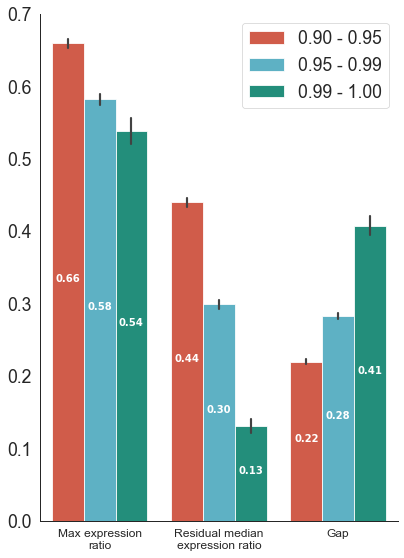

In [170]:
def show_values_on_bars(axs, i=0, fontsize=10, rotation=0, color='black', pad=10):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            print(p)
            _x = p.get_x() + p.get_width()/2 
            _y = p.get_y() + (p.get_height()/2) + pad
            if i == 0:
                value = "{:,.0f}".format(p.get_height())
            if i == 2:
                value = "{:.2f}".format(p.get_height())

            if i == 3:
                value = "{:.3f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation, color=color, fontweight='semibold')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

cutoffs = [0.9, 0.95, 0.99]
l_df = list()
for j, c in enumerate(cutoffs):
    print(j, len(cutoffs), c)
    if j < (len(cutoffs) - 1):
        tmp = exotic_gap.loc[
            (exotic_gap["Max"] >= c) & (exotic_gap["Max"] < cutoffs[j + 1]),
            ["Max", "pext_max", "pext_median_except_max", "pext_shift"],
        ]
    else:
        tmp = exotic_gap.loc[exotic_gap["Max"] >= c, ["Max", "pext_max", "pext_median_except_max", "pext_shift"]]
    tmp["Threshold"] = c
    l_df.append(tmp)
tmp_df = pd.concat(l_df)
tmp_df = tmp_df.rename(
    {
        "pext_max": "Max expression\nratio",
        "pext_median_except_max": "Residual median\nexpression ratio",
        "pext_shift": "Gap",
    },
    axis=1,
)
tmp_df = tmp_df.melt(id_vars="Threshold", value_vars=["Max expression\nratio", "Residual median\nexpression ratio", "Gap"])
tmp_df

## BARPLOT PEXT SHIFT
# print(tmp_df.groupby(["Threshold", "variable"]).describe())

sns.set_style('white')
sns.set_context("paper", font_scale=2)
f, ax = plt.subplots(figsize=(6, 10))
v = sns.barplot(data=tmp_df, x="variable", y="value", hue="Threshold", ax=ax, palette=["#E64B34", "#4DBBD5", "#11A087"])
v.set_xticklabels(v.get_xticklabels(), rotation=45)
plt.xlabel("")
plt.ylabel("")
plt.ylim(0,0.7)
# ax.grid(True, axis="y")
f.tight_layout(rect=[0, 0.05, 1, 1])
v.set_xticklabels(v.get_xticklabels(), rotation=0, fontsize=12)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
legend = v.get_legend()
legend.set_title('')
show_values_on_bars(ax, i=2, rotation=0, color='white', pad=0)
# ax.text(-0.15, 1.05, 'a', transform=ax.transAxes, size=24, weight='bold')

# f.savefig("data/paper/1_EXOTIC/barplot_test_pext_shift.png")
legend = v.get_legend()
legend.set_title('')
legend.texts[0].set_text("0.90 - 0.95")
legend.texts[1].set_text("0.95 - 0.99")
legend.texts[2].set_text("0.99 - 1.00")

Rectangle(xy=(-0.4, 0), width=0.266667, height=43, angle=0)
Rectangle(xy=(0.6, 0), width=0.266667, height=23, angle=0)
Rectangle(xy=(1.6, 0), width=0.266667, height=139, angle=0)
Rectangle(xy=(2.6, 0), width=0.266667, height=152, angle=0)
Rectangle(xy=(3.6, 0), width=0.266667, height=31, angle=0)
Rectangle(xy=(4.6, 0), width=0.266667, height=428, angle=0)
Rectangle(xy=(5.6, 0), width=0.266667, height=354, angle=0)
Rectangle(xy=(6.6, 0), width=0.266667, height=258, angle=0)
Rectangle(xy=(7.6, 0), width=0.266667, height=172, angle=0)
Rectangle(xy=(8.6, 0), width=0.266667, height=50, angle=0)
Rectangle(xy=(9.6, 0), width=0.266667, height=581, angle=0)
Rectangle(xy=(10.6, 0), width=0.266667, height=271, angle=0)
Rectangle(xy=(11.6, 0), width=0.266667, height=44, angle=0)
Rectangle(xy=(12.6, 0), width=0.266667, height=456, angle=0)
Rectangle(xy=(13.6, 0), width=0.266667, height=117, angle=0)
Rectangle(xy=(14.6, 0), width=0.266667, height=34, angle=0)
Rectangle(xy=(15.6, 0), width=0.266667, 

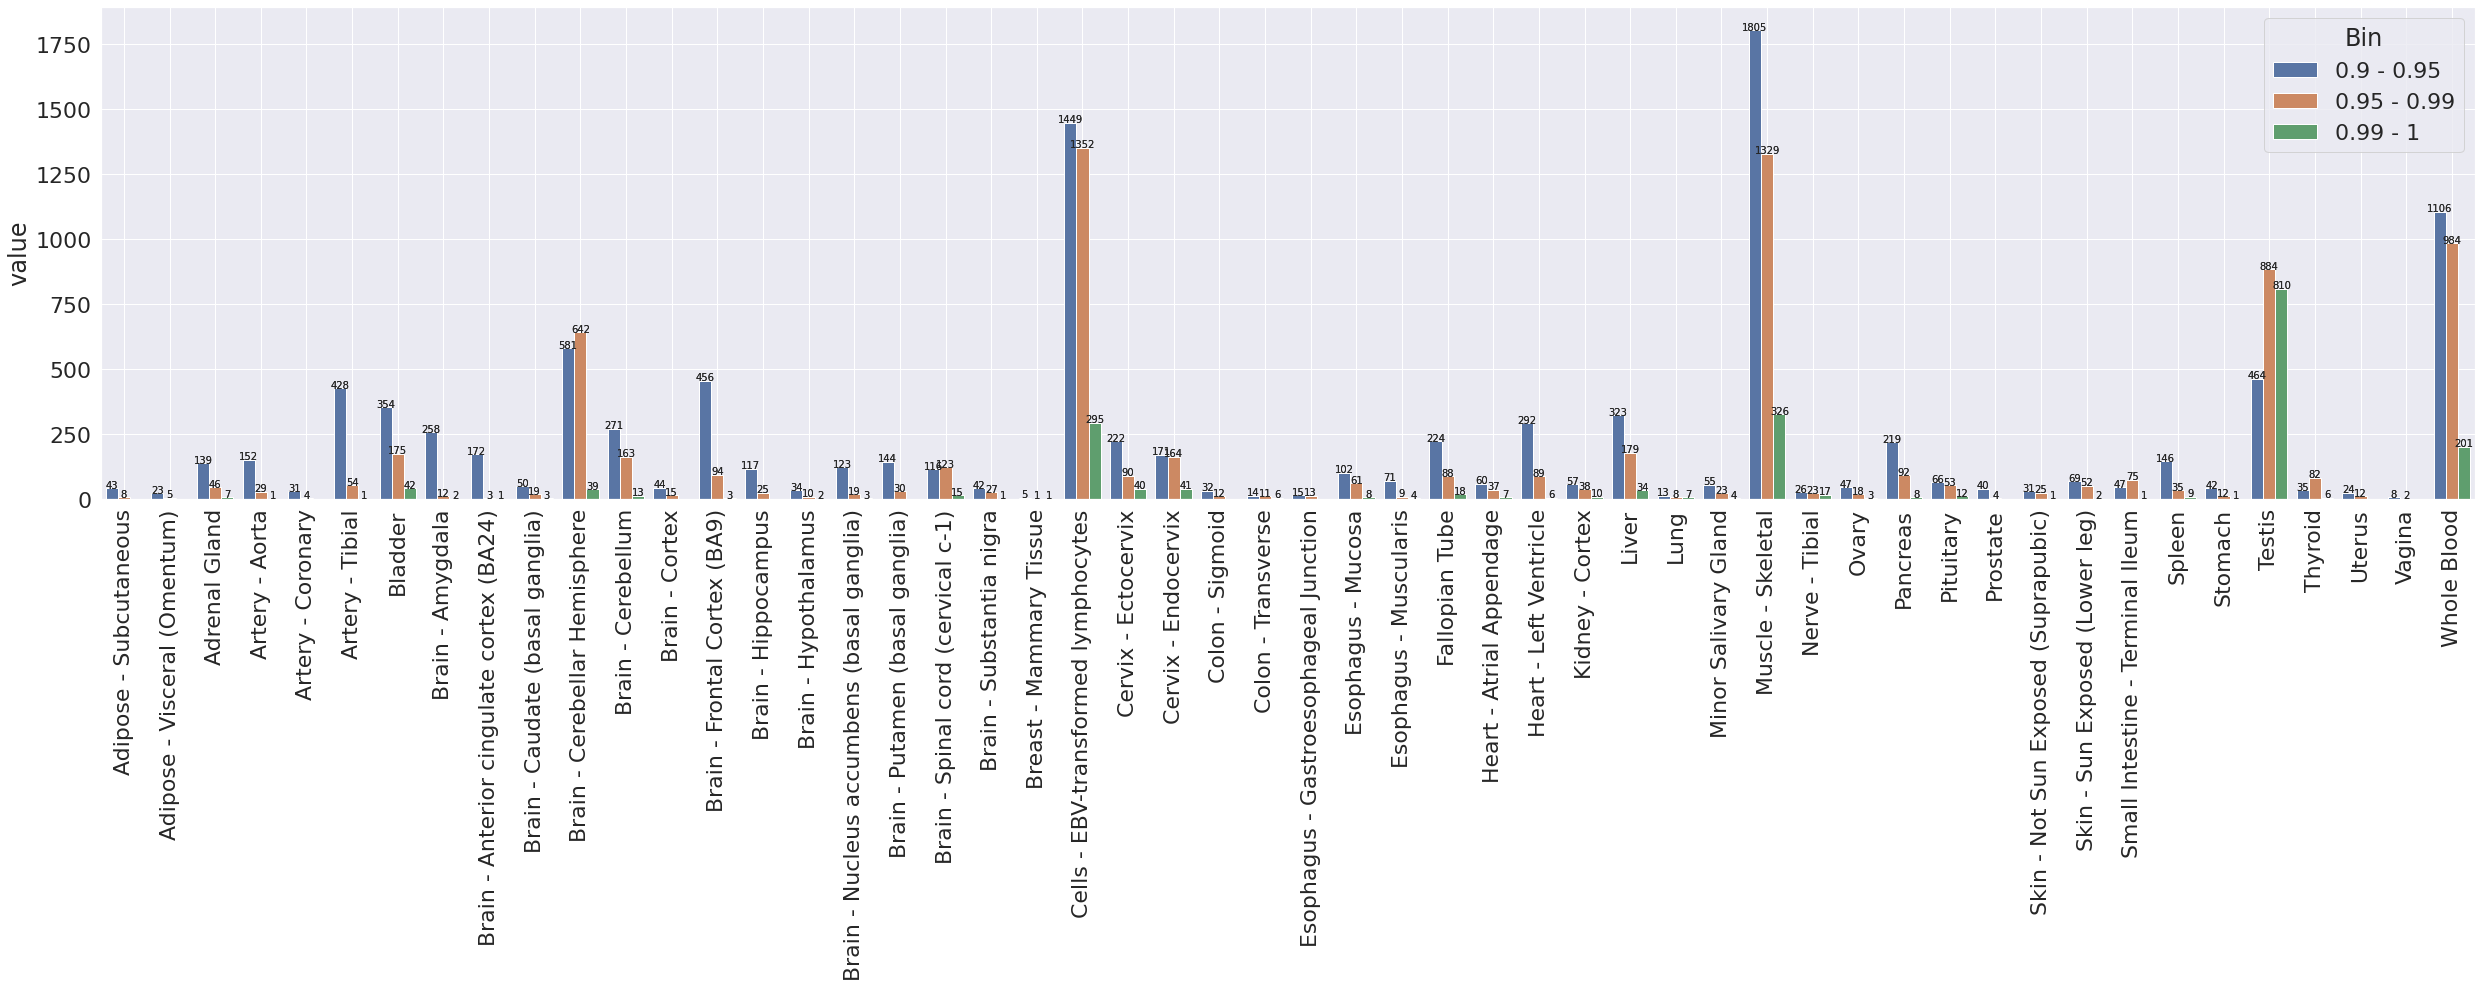

In [45]:

# BARPLOT TISSUES CUTOFFS

tmp_barplot_tissues = (
    exotic[["Max", "Tissues_Max", "pext_max", "Max_bins"]]
    .explode("Tissues_Max")
    .groupby(["Tissues_Max", "Max_bins"])
    .size()
    .reset_index()
)
tmp_barplot_tissues.columns = ["Tissue", "Bin", "value"]
tmp_barplot_tissues["Bin"] = tmp_barplot_tissues["Bin"].cat.remove_categories(["0 - 0.9"])

# print(tmp_barplot_tissues)

sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(35, 15))
v = sns.barplot(data=tmp_barplot_tissues, x="Tissue", y="value", hue="Bin", ax=ax)
show_values_on_bars(v, 0)
v.set_xticklabels(v.get_xticklabels(), rotation=90)
plt.xlabel("")
ax.grid(True, axis="x")
f.tight_layout(rect=[0, 0.05, 1, 1])
# f.savefig("data/paper/1_EXOTIC/barplot_test_exotic_bins_tissues_05_01.png")


(0.0, 10.0)

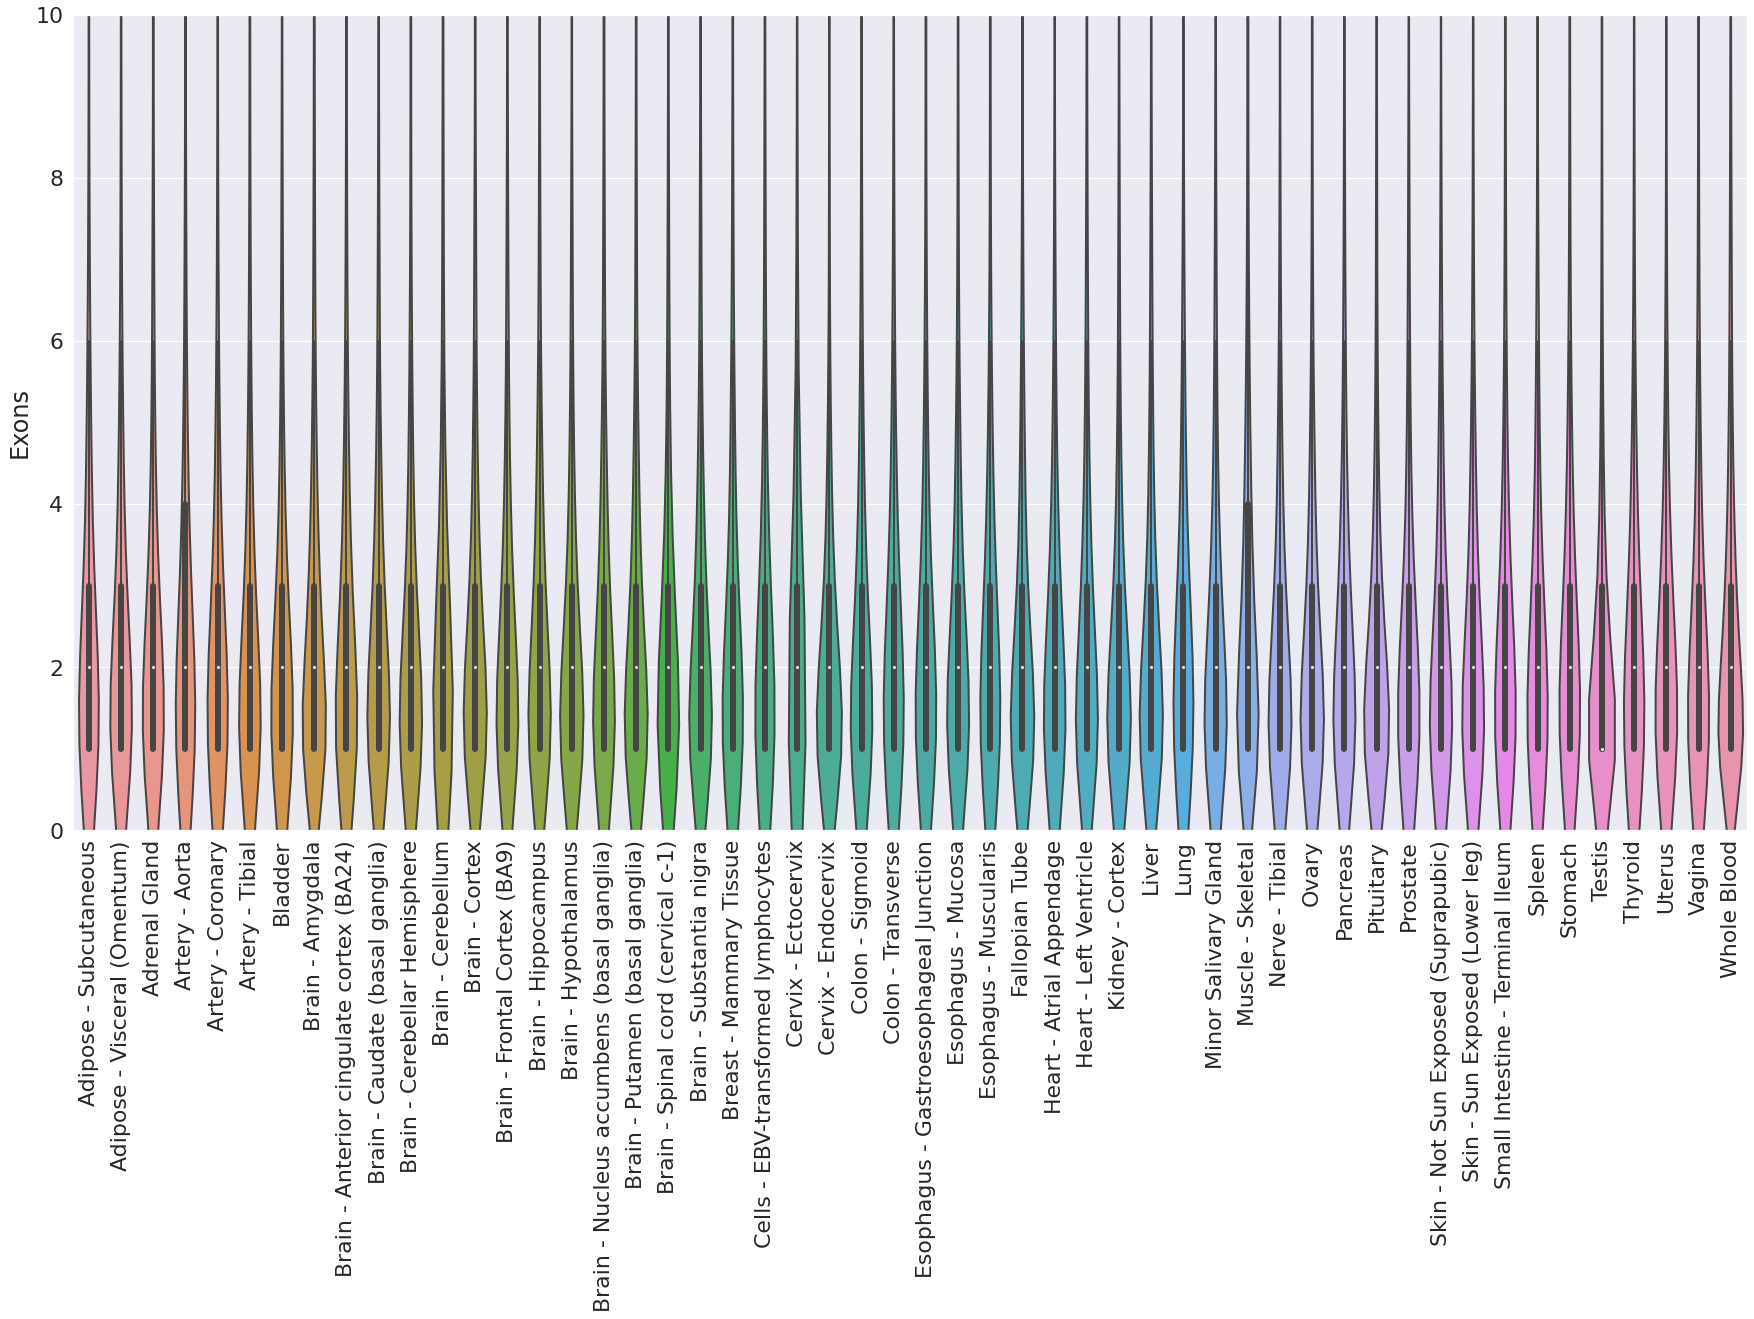

In [47]:


# BARPLOT TISSUES TOTAL

tmp_barplot_tissues = (
    exotic[["Tissues_Max", "symbol", "MAP"]].explode("Tissues_Max").groupby(["Tissues_Max", "symbol"]).nunique()
)
# tmp_barplot_tissues["Ratio"] = tmp_barplot_tissues["MAP"] / tmp_barplot_tissues["symbol"]
tmp_barplot_tissues.columns = ["Remove", "Genes", "Exons"]
tmp_barplot_tissues = tmp_barplot_tissues.drop(["Remove", "Genes"], axis=1).reset_index()

f, ax = plt.subplots(figsize=(30, 15))
v = sns.violinplot(data=tmp_barplot_tissues, x="Tissues_Max", y="Exons", linewidth=2)
show_values_on_bars(v, 2)
v.set_xticklabels(v.get_xticklabels(), rotation=90)
plt.xlabel("")
ax.grid(True, axis="x")
ax.set_ylim(0, 10)


In [50]:
tmp_barplot_tissues

,Tissues_Max,symbol,Exons
0,Adipose - Subcutaneous,A2ML1,12
1,Adipose - Subcutaneous,ABI3BP,2
2,Adipose - Subcutaneous,ACBD5,1
3,Adipose - Subcutaneous,ACHE,1
4,Adipose - Subcutaneous,ACOXL,8
...,...,...,...
58826,Whole Blood,ZSCAN21,1
58827,Whole Blood,ZSCAN25,4
58828,Whole Blood,ZSCAN30,2
58829,Whole Blood,ZWILCH,5


In [ ]:


tmp_barplot_tissues = (
    tmp_barplot_tissues.reset_index().melt(id_vars="Tissues_Max", value_vars=["Genes", "Exons"])
)

mask = tmp_barplot_tissues.variable.isin(["Genes", "Exons"])
scale = float(tmp_barplot_tissues[~mask].value.mean() / tmp_barplot_tissues[mask].value.mean())
tmp_barplot_tissues.loc[mask, "value"] = tmp_barplot_tissues.loc[mask, "value"] * scale
# print(mask)

tmp_barplot_tissues.columns = ["Tissue", "value"]
tmp_barplot_tissues["Bin"] = tmp_barplot_tissues["Bin"].cat.remove_categories(["0 - 0.9"])

# print(tmp_barplot_tissues)

sns.set(font_scale=2)
f, ax1 = plt.subplots(figsize=(30, 15))
v = sns.barplot(data=tmp_barplot_tissues, x="Tissues_Max", y="value", hue="variable", ax=ax1)

# Create a second y-axis with the scaled ticks
# ax1.set_ylabel("X and Y")
# ax2 = ax1.twinx()

# Ensure ticks occur at the same positions, then modify labels
# ax2.set_ylim(ax1.get_ylim())
# ax2.set_yticklabels(np.round(ax1.get_yticks() / scale, 1))
# ax2.set_ylabel("A and B")

show_values_on_bars(v, 0)
v.set_xticklabels(v.get_xticklabels(), rotation=90)
plt.xlabel("")

ax1.grid(True, axis="x")
f.tight_layout(rect=[0, 0.05, 1, 1])
# f.savefig("data/paper/1_EXOTIC/barplot_test_exotic_tissues.png")


In [ ]:
tmp_barplot = exotic.copy()
tmp_barplot["Min"] = tmp_barplot.apply(lambda r: min(r), axis=1)
tmp_barplot["Median"] = tmp_barplot.apply(lambda r: np.median(r), axis=1)
tmp_barplot["Mean"] = tmp_barplot.apply(lambda r: np.mean(r), axis=1)

plot_basic_stats_exotic = tmp_barplot[["Min", "Max", "Median", "Mean"]].melt(value_vars=["Min", "Max", "Median", "Mean"])

f, ax = plt.subplots(figsize=(10, 10))
v = sns.violinplot(data=plot_basic_stats_exotic, x="variable", y="value", ax=ax, linewidth=3)
# v.set_xticklabels(v.get_xticklabels(), rotation=90)
# plt.xlabel("")
ax.grid(True, axis="y")
# f.tight_layout(rect=[0, 0.05, 1, 1])
# f.savefig("data/paper/1_EXOTIC/violin_stats.png")

In [122]:
l = list()
l_pext_values = list()
values = [0.8, 0.9, 0.95, 0.99]
# values = [0.999]
for j, value in enumerate(values):
    if j < len(values) - 1:
        tmp_exotic = exotic.loc[(exotic["value"] >= value) & (exotic["value"] < values[j + 1])]
    else:
        tmp_exotic = exotic.loc[(exotic["value"] >= value)]
    tmp_pext = pext.loc[tmp_exotic.index]

    # print(tmp_pext.parallel_apply(apply_pext_comparison, axis=1))
    tmp_pext["hue"] = value
    # print(tmp_pext)
    # exit

    # tmp_pext_pivot = pd.pivot(tmp_pext, index="MAP", columns="variable", values="value")
    # tmp_pext_others = intermediate_file.loc[intermediate_file["MAP"].isin(list(tmp_pext.MAP.unique()))]
    # print(tmp_pext_pivot)
    # print(tmp_pext_others)
    # exit()
    # low = tmp_pext.loc[tmp_pext["value"] < 0.1]
    # for i, row in low.iterrows():
    # print(row)
    # print(pext.loc[pext["symbol"] == row["symbol"]].pivot(index="MAP", columns="variable", values="value"))
    # print(pext.loc[pext["symbol"].isin(low.symbol.unique().tolist())])
    # exit()
    # print(tmp_exotic)
    # print(tmp_pext)
    l_pext_values.append(tmp_pext)
    tmp_exotic = tmp_exotic.groupby("variable").size()
    l.append(tmp_exotic)
plot_exotic = pd.concat(l, axis=1).reset_index()
plot_exotic.columns = ["Tissue"] + values
plot_exotic = plot_exotic.melt(id_vars="Tissue", value_vars=values)
# plot_exotic = plot_exotic.loc[~plot_exotic["Tissue"].isin(["Min", "Max", "Median", "Mean"])]
plot_exotic_pext = pd.concat(l_pext_values, axis=0)

KeyError: 'value'

In [127]:
exotic.columns

Index(['Adipose - Subcutaneous_exotic', 'Adipose - Visceral (Omentum)_exotic',
       'Adrenal Gland_exotic', 'Artery - Aorta_exotic',
       'Artery - Coronary_exotic', 'Artery - Tibial_exotic', 'Bladder_exotic',
       'Brain - Amygdala_exotic',
       'Brain - Anterior cingulate cortex (BA24)_exotic',
       'Brain - Caudate (basal ganglia)_exotic',
       'Brain - Cerebellar Hemisphere_exotic', 'Brain - Cerebellum_exotic',
       'Brain - Cortex_exotic', 'Brain - Frontal Cortex (BA9)_exotic',
       'Brain - Hippocampus_exotic', 'Brain - Hypothalamus_exotic',
       'Brain - Nucleus accumbens (basal ganglia)_exotic',
       'Brain - Putamen (basal ganglia)_exotic',
       'Brain - Spinal cord (cervical c-1)_exotic',
       'Brain - Substantia nigra_exotic', 'Breast - Mammary Tissue_exotic',
       'Cells - EBV-transformed lymphocytes_exotic',
       'Cervix - Ectocervix_exotic', 'Cervix - Endocervix_exotic',
       'Colon - Sigmoid_exotic', 'Colon - Transverse_exotic',
       'Esop

In [126]:


# exit()
# # exotic["MAP"] = intermediate_file["MAP"]

# # Binning EXOTIC
# # bins = [0, 0.5, 0.8, 0.9, 0.95, 0.99, 0.995, 0.999, 1]
# bins = [0, 0.9, 0.95, 0.99, 1]
# labels = bins.copy()
# labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
# exotic["Max_bins"] = pd.cut(exotic["Max"], bins=bins, labels=labels_ratio, include_lowest=True)

exotic = exotic.melt(id_vars=["MAP"], value_vars=exotic.columns[:-1])
exotic["variable"] = exotic["variable"].str.replace("_exotic", "")
pext = pext.melt(id_vars=["MAP", "symbol"], value_vars=pext.columns[:-2])
pext["variable"] = pext["variable"].str.replace("_pextvalue", "")

def apply_pext_comparison(r):
    median_pext_value_other_tissues = float(
        (
            intermediate_file.loc[intermediate_file["MAP"] == r["MAP"]]
            .filter(regex="pext")
            .T.dropna()
            .drop(r["variable"] + "_pextvalue")
            .median()
        )
    )
    fold = float(r["value"] / median_pext_value_other_tissues)
    r["median_others"] = median_pext_value_other_tissues
    r["fold"] = fold
    return r

l = list()
l_pext_values = list()
values = [0.8, 0.9, 0.95, 0.99]
# values = [0.999]
for j, value in enumerate(values):
    if j < len(values) - 1:
        tmp_exotic = exotic.loc[(exotic["value"] >= value) & (exotic["value"] < values[j + 1])]
    else:
        tmp_exotic = exotic.loc[(exotic["value"] >= value)]
    tmp_pext = pext.loc[tmp_exotic.index]

    # print(tmp_pext.parallel_apply(apply_pext_comparison, axis=1))
    tmp_pext["hue"] = value
    # print(tmp_pext)
    # exit

    # tmp_pext_pivot = pd.pivot(tmp_pext, index="MAP", columns="variable", values="value")
    # tmp_pext_others = intermediate_file.loc[intermediate_file["MAP"].isin(list(tmp_pext.MAP.unique()))]
    # print(tmp_pext_pivot)
    # print(tmp_pext_others)
    # exit()
    # low = tmp_pext.loc[tmp_pext["value"] < 0.1]
    # for i, row in low.iterrows():
    # print(row)
    # print(pext.loc[pext["symbol"] == row["symbol"]].pivot(index="MAP", columns="variable", values="value"))
    # print(pext.loc[pext["symbol"].isin(low.symbol.unique().tolist())])
    # exit()
    # print(tmp_exotic)
    # print(tmp_pext)
    l_pext_values.append(tmp_pext)
    tmp_exotic = tmp_exotic.groupby("variable").size()
    l.append(tmp_exotic)
plot_exotic = pd.concat(l, axis=1).reset_index()
plot_exotic.columns = ["Tissue"] + values
plot_exotic = plot_exotic.melt(id_vars="Tissue", value_vars=values)
# plot_exotic = plot_exotic.loc[~plot_exotic["Tissue"].isin(["Min", "Max", "Median", "Mean"])]
plot_exotic_pext = pd.concat(l_pext_values, axis=0)



Exception: Data must be 1-dimensional

In [ ]:
plt.style.use("ggplot")

sns.set(font_scale=2)

f, ax = plt.subplots(figsize=(35, 15))
v = sns.barplot(data=plot_exotic, x="variable", y="value", ax=ax)
v.set_xticklabels(v.get_xticklabels(), rotation=90)
plt.xlabel("")
ax.grid(True, axis="x")
f.tight_layout(rect=[0, 0.05, 1, 1])
f.savefig("data/paper/1_EXOTIC/barplot_test.png")

sns.set(font_scale=1)

f, ax = plt.subplots(figsize=(45, 15))
v = sns.boxplot(data=plot_exotic_pext, x="hue", y="value", ax=ax)
v.set_xticklabels(v.get_xticklabels(), rotation=90)
plt.xlabel("")
ax.grid(True, axis="x")
# f.tight_layout(rect=[0, 0.05, 1, 1])
f.savefig("data/paper/1_EXOTIC/violin_pext.png")
